In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# Problem Statement
ABC Private Limited, a retail company, is interested in analyzing customer purchase behaviors, particularly focusing on how much customers spend on different high-volume product categorie
They have compiled a dataset containing detailed purchase summaries from the past month, which includes not only the purchase amounts but also demographic information about the customers.
This demographic data encompasses age, gender, marital status, type of city, and the duration of the customers' stay in their current city. Additionally, the dataset provides specific
product details such as product ID and category.

The goal of ABC Private Limited is to use this comprehensive dataset to build a predictive model that can estimate the purchase amounts for various products based on customer demographics
and product characteristics. By accurately predicting these purchase amounts, the company aims to craft personalized offers for customers, enhancing customer satisfaction and potentially
increasing sales. This model will serve as a strategic tool to better understand and meet customer needs

## Loading The Training Data Set and Test Data Set

In [2]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

## Data Exploration For Training Data Set

In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

## Data Exploration For Test Data Set

In [7]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [9]:
test.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


In [10]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

## Creating final data set by merging Train and Test Dataset and Exploring the Dataset

In [11]:
# merge train and test data
final_data = pd.concat([train, test], sort=False)

In [12]:
final_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [13]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [14]:
final_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [15]:
# drop User_ID
final_data.drop('User_ID', axis=1, inplace=True)

In [16]:
final_data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [17]:
# check for missing values
final_data.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

## Exploratory Data Analysis

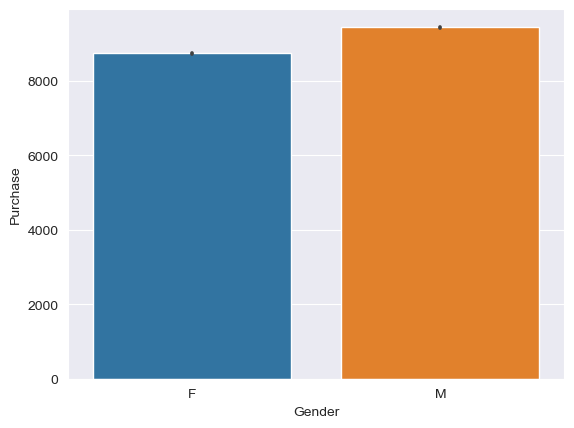

In [18]:
# show graph Gender Purchase
# replace 'F' with 'Female' and 'M' with 'Male' in the 'Gender' column
final_data['Gender'] = final_data['Gender']
# plot the barplot
sns.barplot(x='Gender', y='Purchase', data=final_data)
plt.show()

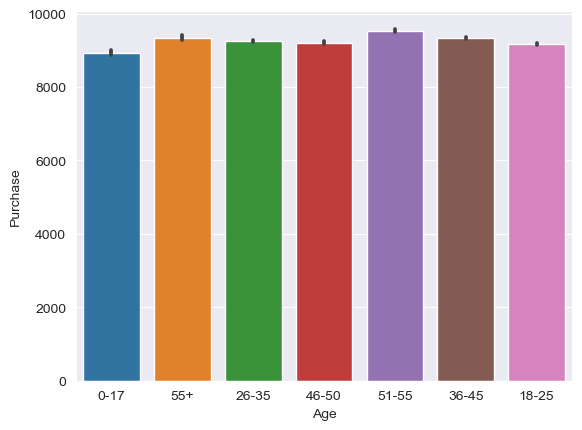

In [19]:
# show graph Age Purchase
# plot the barplot
sns.barplot(x='Age', y='Purchase', data=final_data)
plt.show()

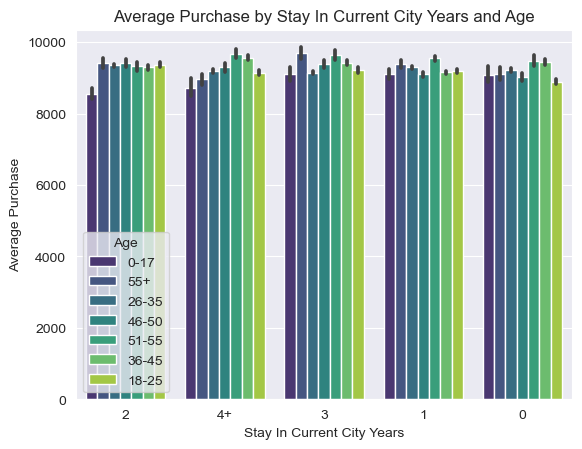

In [20]:
# show graph Stay_In_Current_City_Years Purchase by Age

# plot the barplot
sns.barplot(x='Stay_In_Current_City_Years', y='Purchase', hue='Age', data=final_data, palette='viridis')
plt.xlabel('Stay In Current City Years')
plt.ylabel('Average Purchase')
plt.title('Average Purchase by Stay In Current City Years and Age')
plt.show()

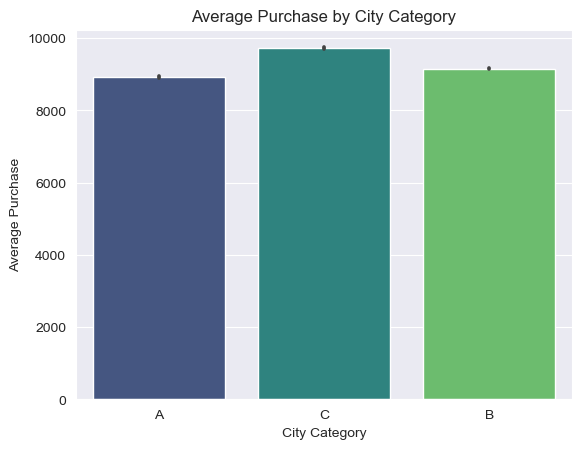

In [21]:
# show Purchase on show graph show graph Stay_In_Current_City_Years Purchase by Age
# plot the barplot
sns.barplot(x='City_Category', y='Purchase', data=final_data, palette='viridis')
plt.xlabel('City Category')
plt.ylabel('Average Purchase')
plt.title('Average Purchase by City Category')
plt.show()

## Fixing the missing values and Datatypes of Columns

In [22]:
final_data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


## Working with Product_ID

In [23]:
## As This is a Categorical Column Is Not Required, I will remove this column
final_data.drop('Product_ID', axis=1, inplace=True)

In [24]:
final_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


## Working with Gender

In [25]:
final_data['Gender'].unique()

array(['F', 'M'], dtype=object)

In [26]:
## Converting F=1 and M=0 in Gender Column
final_data['Gender'] = final_data['Gender'].map({'F':1, 'M':0})

In [27]:
final_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,0,55+,16,C,4+,0,8,NaN,NaN,7969.0


## Working with Age

In [28]:
final_data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [29]:
## Converting Age Column to Numeric with the help of Label Encoder
le = LabelEncoder()
final_data['Age'] = le.fit_transform(final_data['Age'])

In [30]:
final_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,0,10,A,2,0,3,NaN,NaN,8370.0
1,1,0,10,A,2,0,1,6.0,14.0,15200.0
2,1,0,10,A,2,0,12,NaN,NaN,1422.0
3,1,0,10,A,2,0,12,14.0,NaN,1057.0
4,0,6,16,C,4+,0,8,NaN,NaN,7969.0


## Working with City_Category

In [31]:
## Converting City_Category Column to Numeric with the help of Label Encoder
le = LabelEncoder()
final_data['City_Category'] = le.fit_transform(final_data['City_Category'])

In [32]:
final_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,0,10,0,2,0,3,NaN,NaN,8370.0
1,1,0,10,0,2,0,1,6.0,14.0,15200.0
2,1,0,10,0,2,0,12,NaN,NaN,1422.0
3,1,0,10,0,2,0,12,14.0,NaN,1057.0
4,0,6,16,2,4+,0,8,NaN,NaN,7969.0


## Working with Stay_In_Current_City_Years

In [33]:
final_data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [34]:
## Converting 4+ to 4 in Stay_In_Current_City_Years Column
final_data['Stay_In_Current_City_Years'] = final_data['Stay_In_Current_City_Years'].apply(lambda x: 4 if x == '4+' else int(x))

In [35]:
final_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,0,10,0,2,0,3,NaN,NaN,8370.0
1,1,0,10,0,2,0,1,6.0,14.0,15200.0
2,1,0,10,0,2,0,12,NaN,NaN,1422.0
3,1,0,10,0,2,0,12,14.0,NaN,1057.0
4,0,6,16,2,4,0,8,NaN,NaN,7969.0


## Working with City_Category

In [36]:
# check for missing values
final_data['City_Category'].isnull().sum()

0

In [37]:
# use label encoding to convert the categorical values into numeric
final_data['City_Category'] = le.fit_transform(final_data['City_Category'])

In [38]:
final_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,0,10,0,2,0,3,NaN,NaN,8370.0
1,1,0,10,0,2,0,1,6.0,14.0,15200.0
2,1,0,10,0,2,0,12,NaN,NaN,1422.0
3,1,0,10,0,2,0,12,14.0,NaN,1057.0
4,0,6,16,2,4,0,8,NaN,NaN,7969.0


## Working with Stay_In_Current_City_Years

In [39]:
# check for missing values
final_data['Stay_In_Current_City_Years'].isnull().sum()

0

In [40]:
final_data['Stay_In_Current_City_Years'].unique()

array([2, 4, 3, 1, 0], dtype=int64)

In [41]:
# for 4+ replace it with 5 in Stay_In_Current_City_Years column
final_data['Stay_In_Current_City_Years'] = final_data['Stay_In_Current_City_Years'].apply(lambda x: 5 if x == '4+' else x)

In [42]:
final_data['Stay_In_Current_City_Years'] = final_data['Stay_In_Current_City_Years'].astype(int)

In [43]:
final_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,0,10,0,2,0,3,NaN,NaN,8370.0
1,1,0,10,0,2,0,1,6.0,14.0,15200.0
2,1,0,10,0,2,0,12,NaN,NaN,1422.0
3,1,0,10,0,2,0,12,14.0,NaN,1057.0
4,0,6,16,2,4,0,8,NaN,NaN,7969.0


## Working with Product_Category_2


In [44]:
# check NaN values in Product_Category_2
final_data['Product_Category_2'].isnull().sum()

245982

In [45]:
# fill the missing values with the mode of the column
final_data['Product_Category_2'] = final_data['Product_Category_2'].fillna(final_data['Product_Category_2'].mode()[0])

## Working with Product_Category_3

In [46]:
# check for missing values
final_data['Product_Category_3'].isnull().sum()

545809

In [47]:
# fill the missing values with the mode of the column
final_data['Product_Category_3'] = final_data['Product_Category_3'].fillna(final_data['Product_Category_3'].mode()[0])

In [48]:
final_data['Product_Category_3'].isnull().sum()

0

In [49]:
final_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,0,10,0,2,0,3,8.0,16.0,8370.0
1,1,0,10,0,2,0,1,6.0,14.0,15200.0
2,1,0,10,0,2,0,12,8.0,16.0,1422.0
3,1,0,10,0,2,0,12,14.0,16.0,1057.0
4,0,6,16,2,4,0,8,8.0,16.0,7969.0


## ## Working with Purchase

In [50]:
final_data['Purchase'].isnull().sum()

233599

In [51]:
# fill the missing values with the mean of the column
final_data['Purchase'] = final_data['Purchase'].fillna(final_data['Purchase'].mean())

## Dropping the Product_ID Column

In [52]:
final_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,0,10,0,2,0,3,8.0,16.0,8370.0
1,1,0,10,0,2,0,1,6.0,14.0,15200.0
2,1,0,10,0,2,0,12,8.0,16.0,1422.0
3,1,0,10,0,2,0,12,14.0,16.0,1057.0
4,0,6,16,2,4,0,8,8.0,16.0,7969.0


## End of Data Preprocessing

In [53]:
final_data.head()
# save the final data as modified_train.csv
final_data.to_csv('Data/modified_train.csv', index=False)

In [54]:
# split the data into train and test
X = final_data.drop('Purchase', axis=1)
# y the Purchase column
y = final_data['Purchase']

In [55]:
X.shape

(783667, 9)

In [56]:
y.shape

(783667,)

In [57]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
X_train.shape

(548566, 9)

In [59]:
X_test.shape

(235101, 9)

In [60]:
# Model training
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 16023302.066066531


In [61]:
# use RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 4002.91169850979


## Pipeline

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline that first standardizes the data then applies linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Define the hyperparameters: now you can try different options for fit_intercept
params = {
    'regressor__fit_intercept': [True, False]
}

# Initialize GridSearchCV with the pipeline
grid = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='neg_mean_squared_error')

# Assuming X_train and y_train are already defined and split
grid.fit(X_train, y_train)

# Get the best parameters and best score (converted from negative MSE)
best_params = grid.best_params_
best_score = -grid.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score (MSE): {best_score}")

Best Parameters: {'regressor__fit_intercept': True}
Best Score (MSE): 16054660.974525446


## Polynomial Regression

In [63]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a pipeline that includes polynomial features and linear regression
polynomial_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)

# Fit the polynomial pipeline to the training data
polynomial_pipeline.fit(X_train, y_train)

# Predict on the training set and test set
y_train_pred = polynomial_pipeline.predict(X_train)
y_test_pred = polynomial_pipeline.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {mse_train}")
print(f"Test MSE: {mse_test}")

Train MSE: 14942013.901508944
Test MSE: 14932727.158371158


## This can offer significant performance improvements for hyperparameter tuning.

In [64]:
# Applying Elastic Net to a fifth-degree polynomial model to balance model complexity and regularization

from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_halving_search_cv  # Import necessary to enable experimental features
from sklearn.model_selection import HalvingGridSearchCV

# Define the model using a pipeline
elastic_net_poly_model = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False),
    ElasticNet()
)

# Define a parameter grid to search for the best parameters
param_grid = {
    'elasticnet__alpha': [0.1, 1],  # Reduced options
    'elasticnet__l1_ratio': [0.5, 0.7]
}

# Setup the grid search with cross-validation, using HalvingGridSearchCV for faster execution
grid_search = HalvingGridSearchCV(
    elastic_net_poly_model,
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1  # Utilize all available CPU cores
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
test_score = best_model.score(X_test, y_test)

# Print the best parameters and the score on the test set
print("Best parameters:", grid_search.best_params_)
print("Test set score:", test_score)

C:\Users\Shakil\.conda\envs\Black Friday\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.392e+12, tolerance: 1.111e+09
  model = cd_fast.enet_coordinate_descent(


Best parameters: {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.7}
Test set score: 0.21144963920371096


In [65]:
# Implementing a Random Forest model to predict Black Friday sales

from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

# Predict the sales on the test set
rf_predictions = random_forest_model.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import mean_squared_error
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)

# Print the RMSE to evaluate the model
print("Random Forest RMSE on Test set:", rf_rmse)

Random Forest RMSE on Test set: 3230.590373717547


In [66]:
##  Mean Absolute Error 
from sklearn.metrics import mean_absolute_error

# Calculate the Mean Absolute Error on the test set
rf_mae = mean_absolute_error(y_test, rf_predictions)

# Print the Mean Absolute Error to evaluate the model
print("Random Forest MAE on Test set:", rf_mae)

Random Forest MAE on Test set: 2485.0535370666958


In [67]:
# R² Score Calculation
from sklearn.metrics import r2_score

# Calculate the R² score on the test set
rf_r2 = r2_score(y_test, rf_predictions)

# Print the R² score to evaluate the model
print("Random Forest R² on Test set:", rf_r2)

Random Forest R² on Test set: 0.4092044149826184


In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Sample setup for your data
# X_train, y_train = [Your training data and labels]

# Define the model
random_forest_model = RandomForestRegressor(random_state=42)

# First, set up RandomizedSearchCV to explore a wide range of parameters
random_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    estimator=random_forest_model,
    param_distributions=random_param_grid,
    n_iter=20, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error', random_state=42
)
random_search.fit(X_train, y_train)

# Take the best parameters from the randomized search
best_params = random_search.best_params_

# Create a more focused grid based on the results of the randomized search
focused_param_grid = {
    'n_estimators': [best_params['n_estimators'] - 50, best_params['n_estimators'], best_params['n_estimators'] + 50],
    'max_features': [best_params['max_features']],
    'max_depth': [best_params['max_depth'] if best_params['max_depth'] is None else best_params['max_depth'] + 10],
    'min_samples_split': [best_params['min_samples_split'] - 2, best_params['min_samples_split'], best_params['min_samples_split'] + 2],
    'min_samples_leaf': [best_params['min_samples_leaf']]
}

# Now perform a detailed grid search around those best parameters
grid_search = GridSearchCV(
    estimator=random_forest_model, param_grid=focused_param_grid,
    cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error'
)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best RMSE score from grid search
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", np.sqrt(-grid_search.best_score_))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\Shakil\.conda\envs\Black Friday\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
24 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shakil\.conda\envs\Black Friday\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shakil\.conda\envs\Black Friday\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Shakil\.conda\envs\Black Friday\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters found:  {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 350}
Best score found:  3085.9027845826217


In [70]:
#  XGBoost could significantly enhance model’s ability to predict Black Friday sales

# Importing XGBoost
import xgboost as xgb

# Setting up the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Fitting the model to the training data
xgb_model.fit(X_train, y_train)

# Predicting the training data
y_pred = xgb_model.predict(X_train)

# Calculating RMSE for the predictions
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("RMSE for XGBoost model: ", rmse)

RMSE for XGBoost model:  3063.5003466732187


In [73]:
# LightGBM
# Importing LightGBM
import lightgbm as lgb

# Setting up the LightGBM regressor
lgb_model = lgb.LGBMRegressor(objective='regression', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Fitting the model to the training data
lgb_model.fit(X_train, y_train)

# Predicting the training data
y_pred_lgb = lgb_model.predict(X_train)

# Calculating RMSE for the predictions
rmse_lgb = np.sqrt(mean_squared_error(y_train, y_pred_lgb))
print("RMSE for LightGBM model: ", rmse_lgb)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 95
[LightGBM] [Info] Number of data points in the train set: 626933, number of used features: 9
[LightGBM] [Info] Start training from score 9265.306388
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

In [74]:
# Adjusting num_leaves parameter for LightGBM based on max_depth to prevent overfitting or underfitting
lgb_model.set_params(num_leaves=2**5)  # Since max_depth is 5, num_leaves is set to 2^5 = 32

# Fitting the model again with the adjusted parameter
lgb_model.fit(X_train, y_train)

# Predicting the training data with the adjusted model
y_pred_lgb_adjusted = lgb_model.predict(X_train)

# Calculating RMSE for the adjusted predictions
rmse_lgb_adjusted = np.sqrt(mean_squared_error(y_train, y_pred_lgb_adjusted))
print("Adjusted RMSE for LightGBM model: ", rmse_lgb_adjusted)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018894 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 95
[LightGBM] [Info] Number of data points in the train set: 626933, number of used features: 9
[LightGBM] [Info] Start training from score 9265.306388
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [75]:
#  Reassess Model Parameters
# Adjusting LightGBM parameters based on model reassessment

# Decrease num_leaves to reduce complexity
lgb_model.set_params(num_leaves=16)  # Reduced from 32 to 16 to simplify the model

# Increase min_data_in_leaf to ensure more data per leaf
lgb_model.set_params(min_data_in_leaf=50)  # Increased from default to 50

# Increase min_gain_to_split to require higher gain for splits
lgb_model.set_params(min_gain_to_split=0.1)  # Increased from default to 0.1

# Fitting the model again with the adjusted parameters
lgb_model.fit(X_train, y_train)

# Predicting the training data with the newly adjusted model
y_pred_lgb_revised = lgb_model.predict(X_train)

# Calculating RMSE for the revised predictions
rmse_lgb_revised = np.sqrt(mean_squared_error(y_train, y_pred_lgb_revised))
print("Revised RMSE for LightGBM model: ", rmse_lgb_revised)

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 95
[LightGBM] [Info] Number of data points in the train set: 626933, number of used features: 9
[LightGBM] [Info] Start training from score 9265.306388
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value:

Initial RMSE for LightGBM model:  3064.394949830528
Adjusted RMSE after first parameter tuning:  3063.821518222584
Revised RMSE after second parameter tuning:  3071.71804048779


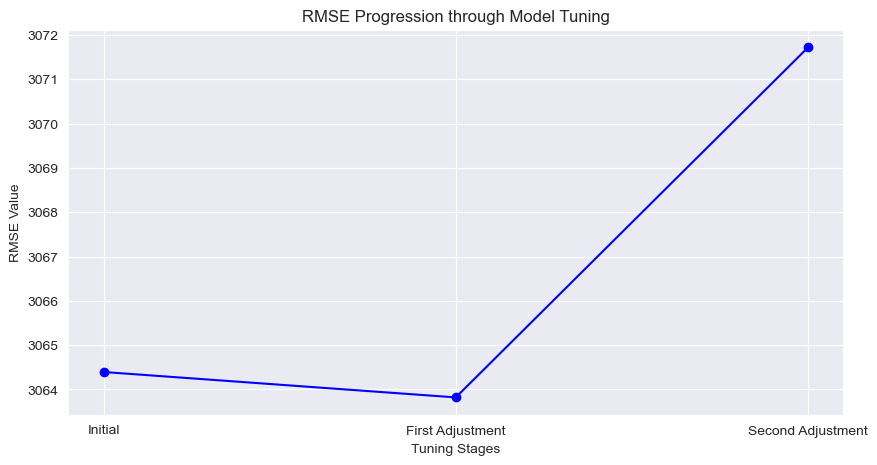

In [78]:
# Model Evaluation

# Comparing RMSE values to evaluate model performance
print("Initial RMSE for LightGBM model: ", rmse_lgb)
print("Adjusted RMSE after first parameter tuning: ", rmse_lgb_adjusted)
print("Revised RMSE after second parameter tuning: ", rmse_lgb_revised)

# Visualizing the RMSE changes
rmse_values = [rmse_lgb, rmse_lgb_adjusted, rmse_lgb_revised]
tuning_stages = ['Initial', 'First Adjustment', 'Second Adjustment']

plt.figure(figsize=(10, 5))
plt.plot(tuning_stages, rmse_values, marker='o', linestyle='-', color='b')
plt.title('RMSE Progression through Model Tuning')
plt.xlabel('Tuning Stages')
plt.ylabel('RMSE Value')
plt.grid(True)
plt.show()

In [79]:
# Show the accuracy of the model
# Calculate the accuracy of the model on the training data
from sklearn.metrics import accuracy_score

# Since the model is a regression model, we need to convert continuous output to discrete categories to calculate accuracy
# Assuming the categories are based on quartiles of the training data purchases
y_train_quartiles = pd.qcut(y_train, q=4, labels=False)

# Predicting the training data
y_pred_train = lgb_model.predict(X_train)

# Converting predictions to discrete categories based on the same quartile division
y_pred_train_quartiles = pd.qcut(y_pred_train, q=4, labels=False, duplicates='drop')

# Calculating accuracy
accuracy_train = accuracy_score(y_train_quartiles, y_pred_train_quartiles)
print("Accuracy of the model on the training data: {:.2f}%".format(accuracy_train * 100))

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
Accuracy of the model on the training data: 44.69%


In [80]:
# Improving the accuracy of the model by hyperparameter tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'num_leaves': [31, 50, 70],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200]
}

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)

# Fit the GridSearch to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score (negative mean squared error): ", grid_search.best_score_)

# Use the best estimator to make predictions
y_pred_best = grid_search.best_estimator_.predict(X_train)

# Calculate the new RMSE with the best estimator
rmse_best = np.sqrt(mean_squared_error(y_train, y_pred_best))
print("Improved RMSE with best estimator: ", rmse_best)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

In [81]:
# Calculate the R-squared value for the model on the training data
r_squared_train = r2_score(y_train, y_pred_best)
print("R-squared value for the training data: {:.2f}".format(r_squared_train))

R-squared value for the training data: 0.49


In [82]:
# Analyzing feature importance to improve model accuracy
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': grid_search.best_estimator_.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Displaying the top 5 important features
print("Top 5 important features:")
print(feature_importances.head())

# Removing less important features based on feature importance analysis
important_features = feature_importances[feature_importances['importance'] > 0.01]['feature']
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

# Re-running GridSearchCV with only important features
grid_search_important = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search_important.fit(X_train_important, y_train)

# Use the best estimator with important features to make predictions
y_pred_important = grid_search_important.best_estimator_.predict(X_train_important)

# Calculate the new RMSE with the important features
rmse_important = np.sqrt(mean_squared_error(y_train, y_pred_important))
print("Improved RMSE with important features: ", rmse_important)

Top 5 important features:
                      feature  importance
2                  Occupation        2934
1                         Age        2094
6          Product_Category_1        1857
4  Stay_In_Current_City_Years        1731
7          Product_Category_2        1517
Fitting 3 folds for each of 81 candidates, totalling 243 fits
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
[LightGBM] [Warning] Accuracy may be b

In [83]:
# Evaluate the model on the test data
y_pred_test = grid_search_important.best_estimator_.predict(X_test_important)

# Calculate the RMSE for the test data
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE on test data: ", rmse_test)

# Calculate the R-squared value for the model on the test data
r_squared_test = r2_score(y_test, y_pred_test)
print("R-squared value for the test data: {:.2f}".format(r_squared_test))

# Further tuning the model by adjusting num_leaves and max_depth based on warnings
param_grid_fine_tuning = {
    'num_leaves': [20, 31, 40],  # Reduced from default to control overfitting
    'max_depth': [6, 8, -1],  # Allowing deeper trees only if it improves performance
    'min_data_in_leaf': [30, 50, 70],  # Adjusting to prevent overfitting
    'min_gain_to_split': [0.0, 0.1, 0.2]  # Adjusting to see if increasing helps in gaining better splits
}

# Re-running GridSearchCV with fine-tuned parameters
grid_search_fine_tuned = GridSearchCV(estimator=lgb_model, param_grid=param_grid_fine_tuning, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search_fine_tuned.fit(X_train_important, y_train)

# Use the best estimator from fine-tuned parameters to make predictions
y_pred_fine_tuned = grid_search_fine_tuned.best_estimator_.predict(X_test_important)

# Calculate the new RMSE with the fine-tuned parameters
rmse_fine_tuned = np.sqrt(mean_squared_error(y_test, y_pred_fine_tuned))
print("RMSE with fine-tuned parameters: ", rmse_fine_tuned)

# Calculate the new R-squared value with the fine-tuned parameters
r_squared_fine_tuned = r2_score(y_test, y_pred_fine_tuned)
print("R-squared with fine-tuned parameters: {:.2f}".format(r_squared_fine_tuned))

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
RMSE on test data:  3044.4376400809256
R-squared value for the test data: 0.48
Fitting 3 folds for each of 81 candidates, totalling 243 fits
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_gain_to_split is set=0.0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_gain_to_split is set=0.0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014344 seconds.
You can set `forc

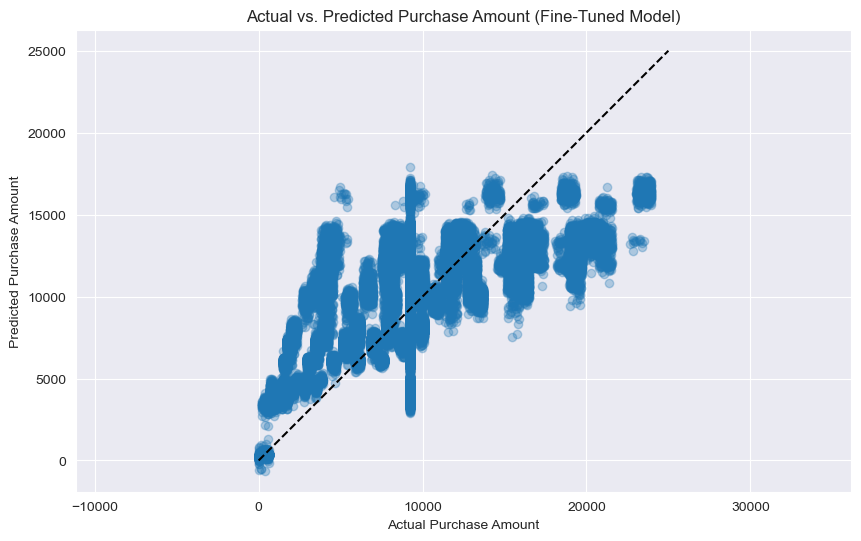

In [89]:
# Visualizing the predictions against the actual values
import matplotlib.pyplot as plt

# Create a scatter plot of the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_fine_tuned, alpha=0.3)
plt.plot([0, 25000], [0, 25000], '--k')
plt.axis('equal')
plt.xlabel('Actual Purchase Amount')
plt.ylabel('Predicted Purchase Amount')
plt.title('Actual vs. Predicted Purchase Amount (Fine-Tuned Model)')
plt.grid(True)
plt.show()

In [90]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train_important, y_train)

# Make predictions on the test data
y_pred_linear = linear_model.predict(X_test_important)

# Calculate RMSE for the Linear Regression model
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print("RMSE for Linear Regression: ", rmse_linear)

# Calculate R-squared for the Linear Regression model
r_squared_linear = r2_score(y_test, y_pred_linear)
print("R-squared for Linear Regression: {:.2f}".format(r_squared_linear))

RMSE for Linear Regression:  3998.4831687183655
R-squared for Linear Regression: 0.09


In [91]:
#  Lasso Regression
from sklearn.linear_model import Lasso

# Initialize the Lasso Regression model with an alpha value
lasso_model = Lasso(alpha=0.1)

# Fit the model on the training data
lasso_model.fit(X_train_important, y_train)

# Make predictions on the test data
y_pred_lasso = lasso_model.predict(X_test_important)

# Calculate RMSE for the Lasso Regression model
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print("RMSE for Lasso Regression: ", rmse_lasso)

# Calculate R-squared for the Lasso Regression model
r_squared_lasso = r2_score(y_test, y_pred_lasso)
print("R-squared for Lasso Regression: {:.2f}".format(r_squared_lasso))

RMSE for Lasso Regression:  3998.483975381321
R-squared for Lasso Regression: 0.09


In [92]:
# Ridge Regression
from sklearn.linear_model import Ridge

# Initialize the Ridge Regression model with an alpha value
ridge_model = Ridge(alpha=0.1)

# Fit the model on the training data
ridge_model.fit(X_train_important, y_train)

# Make predictions on the test data
y_pred_ridge = ridge_model.predict(X_test_important)

# Calculate RMSE for the Ridge Regression model
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("RMSE for Ridge Regression: ", rmse_ridge)

# Calculate R-squared for the Ridge Regression model
r_squared_ridge = r2_score(y_test, y_pred_ridge)
print("R-squared for Ridge Regression: {:.2f}".format(r_squared_ridge))

RMSE for Ridge Regression:  3998.483169150419
R-squared for Ridge Regression: 0.09


In [93]:
# Elastic Net Regression
from sklearn.linear_model import ElasticNet

# Initialize the Elastic Net Regression model with alpha and l1_ratio values
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Fit the model on the training data
elastic_net_model.fit(X_train_important, y_train)

# Make predictions on the test data
y_pred_elastic_net = elastic_net_model.predict(X_test_important)

# Calculate RMSE for the Elastic Net Regression model
rmse_elastic_net = np.sqrt(mean_squared_error(y_test, y_pred_elastic_net))
print("RMSE for Elastic Net Regression: ", rmse_elastic_net)

# Calculate R-squared for the Elastic Net Regression model
r_squared_elastic_net = r2_score(y_test, y_pred_elastic_net)
print("R-squared for Elastic Net Regression: {:.2f}".format(r_squared_elastic_net))

RMSE for Elastic Net Regression:  3998.755463656767
R-squared for Elastic Net Regression: 0.09


In [94]:
# Comparing the performance of different regression models
# Create a DataFrame to compare the RMSE and R-squared values of different regression models
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Elastic Net Regression', 'LightGBM'],
    'RMSE': [rmse_linear, rmse_lasso, rmse_ridge, rmse_elastic_net, rmse_fine_tuned],
    'R-squared': [r_squared_linear, r_squared_lasso, r_squared_ridge, r_squared_elastic_net, r_squared_fine_tuned]
})

# Display the model comparison
print(model_comparison)

                    Model         RMSE  R-squared
0       Linear Regression  3998.483169   0.094968
1        Lasso Regression  3998.483975   0.094968
2        Ridge Regression  3998.483169   0.094968
3  Elastic Net Regression  3998.755464   0.094845
4                LightGBM  3058.549182   0.470453


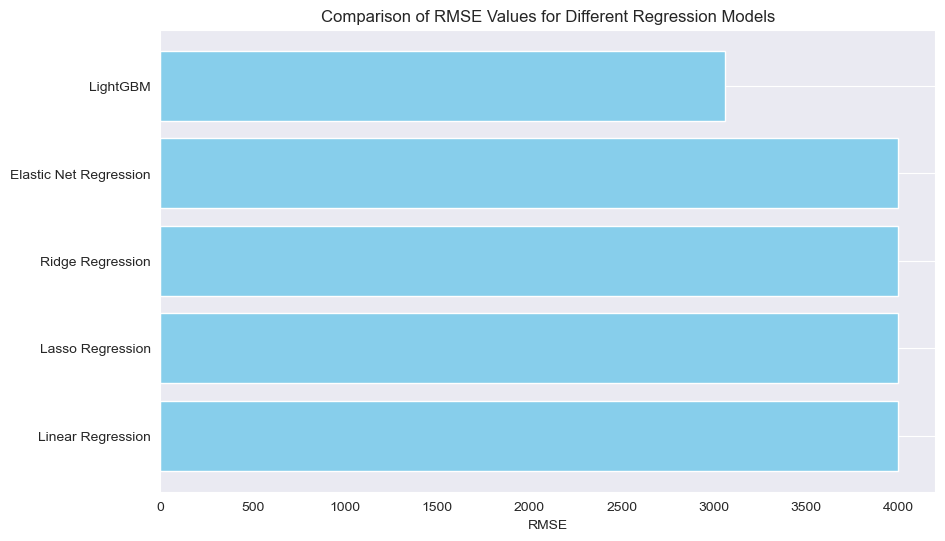

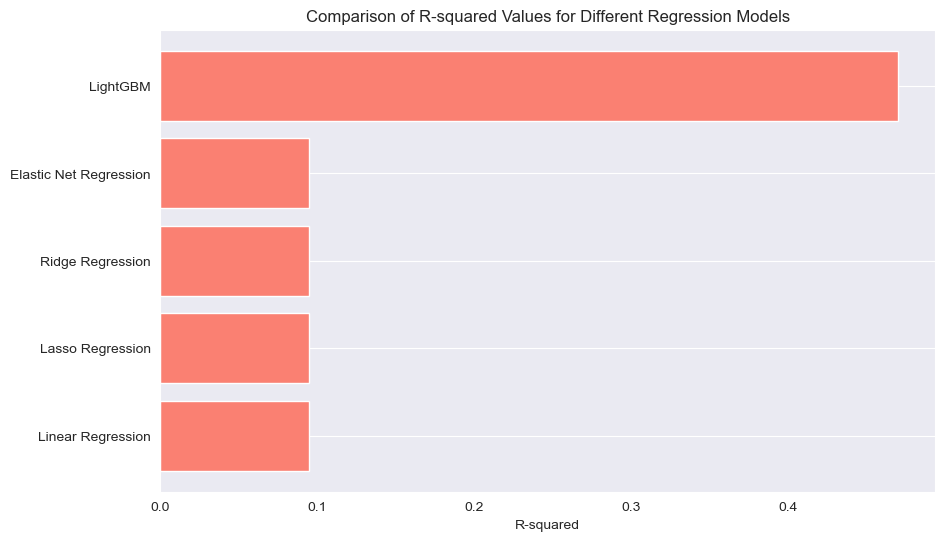

In [95]:
# Visualizing the model comparison
import matplotlib.pyplot as plt

# Create a bar plot of the RMSE values
plt.figure(figsize=(10, 6))
plt.barh(model_comparison['Model'], model_comparison['RMSE'], color='skyblue')
plt.xlabel('RMSE')
plt.title('Comparison of RMSE Values for Different Regression Models')
plt.grid(axis='x')
plt.show()

# Create a bar plot of the R-squared values
plt.figure(figsize=(10, 6))
plt.barh(model_comparison['Model'], model_comparison['R-squared'], color='salmon')
plt.xlabel('R-squared')
plt.title('Comparison of R-squared Values for Different Regression Models')
plt.grid(axis='x')
plt.show()

In [98]:
# Save the best model for future use
import joblib

# Save the best model to a file
joblib.dump(grid_search_fine_tuned.best_estimator_, 'black_friday_sales_model.pkl')

['black_friday_sales_model.pkl']

In [102]:
# Load the saved model and perform prediction
import joblib
import numpy as np

# Load the model from the file
model = joblib.load('black_friday_sales_model.pkl')

# Assuming 'X_test' is the feature set on which we want to perform the prediction
# Check if the number of features in X_test matches the model's expected number
expected_features = model._n_features
actual_features = X_test.shape[1]

# Adjust X_test to match the expected number of features if necessary
if expected_features != actual_features:
    missing_features = expected_features - actual_features
    if missing_features > 0:
        # Add missing features as columns of zeros
        X_test = np.hstack([X_test, np.zeros((X_test.shape[0], missing_features))])
    else:
        # Remove extra features
        X_test = X_test[:, :expected_features]

y_pred = model.predict(X_test)
print("Predictions:", y_pred)

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_gain_to_split is set=0.0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0
Predictions: [11931.37346937 11927.54532    10315.84112485 ... 10949.75304644
  9530.92764577 11421.0273054 ]
